## Analise para  crédito de Imoveis 

## Lista de bibliotecas importadas para realização do projeto

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.model_selection import GridSearchCV, StratifiedKFold, train_test_split
from sklearn.metrics import classification_report, ConfusionMatrixDisplay, f1_score, roc_auc_score, roc_curve, auc
from imblearn.over_sampling import SMOTE

# Importação dos dados para análise

In [3]:
# abrindo o arquivo contendo do DataSet e transformando-os em DataFrame para melhor vizualisação e análise:

df = pd.read_csv('../credito-imoveis/application_train.csv')

df_test = pd.read_csv('../credito-imoveis/application_test_student.csv')

print('planilha de treino: ', df.shape)

planilha de treino:  (246008, 122)


In [4]:
pd.options.display.max_rows = 160       # Almentando as linhas para visualização.
pd.options.display.max_columns = 160    # Almentando as colunas.

# Realização da Exploração e Análise dos Dados - EDA (Expoloration Data Analysis)

Entendendo os dados e preparando os dados:

#### A. Conhecendo o df:

In [5]:
df_test.head()

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,149741,Cash loans,F,N,N,0,117000.0,417024.0,20191.5,360000.0,"Spouse, partner",Working,Incomplete higher,Married,House / apartment,0.020246,-21774,-2125,-4611.0,-4653,NaN,1,1,1,1,1,0,Security staff,2.0,3,3,FRIDAY,13,0,0,0,0,0,0,Medicine,0.484936,0.182710,0.145543,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.0,1.0,0.0,-2008.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
1,363290,Cash loans,M,N,Y,0,450000.0,640080.0,31261.5,450000.0,Unaccompanied,Commercial associate,Higher education,Married,House / apartment,0.046220,-18499,-2055,-3052.0,-2028,NaN,1,1,0,1,0,0,Laborers,2.0,1,1,TUESDAY,13,0,0,0,0,0,0,Business Entity Type 3,0.624574,0.669053,0.680139,0.3763,0.4482,0.9950,NaN,NaN,0.48,0.2069,0.6250,NaN,0.0347,NaN,0.4585,NaN,0.0050,0.3834,0.4651,0.9950,NaN,NaN,0.4834,0.2069,0.6250,NaN,0.0355,NaN,0.4777,NaN,0.0052,0.3799,0.4482,0.9950,NaN,NaN,0.48,0.2069,0.6250,NaN,0.0353,NaN,0.4667,NaN,0.0051,NaN,block of flats,0.4524,Panel,No,0.0,0.0,0.0,0.0,-728.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
2,436006,Revolving loans,M,Y,Y,0,450000.0,900000.0,45000.0,900000.0,Unaccompanied,Commercial associate,Higher education,Single / not married,House / apartment,0.010643,-18084,-4159,-8525.0,-1616,4.0,1,1,0,1,0,0,Managers,1.0,2,2,SUNDAY,14,0,0,0,0,0,0,Construction,NaN,0.454279,0.173527,0.1113,0.0852,0.9836,0.7756,0.0189,0.12,0.1034,0.3333,0.3750,0.0932,0.0908,0.1128,0.0077,0.0047,0.1134,0.0884,0.9836,0.7844,0.0191,0.1208,0.1034,0.3333,0.3750,0.0954,0.0992,0.1175,0.0078,0.0050,0.1124,0.0852,0.9836,0.7786,0.0190,0.12,0.1034,0.3333,0.3750,0.0949,0.0923,0.1148,0.0078,0.0048,reg oper spec account,block of flats,0

In [6]:
df_test.shape

(61503, 121)

In [7]:
df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,456162,0,Cash loans,F,N,N,0,112500.0,700830.0,22738.5,585000.0,Unaccompanied,Working,Incomplete higher,Single / not married,House / apartment,0.019689,-8676,-813,-4163.0,-1363,NaN,1,1,1,1,0,0,Core staff,1.0,2,2,FRIDAY,17,0,0,0,1,1,0,Trade: type 2,NaN,0.699373,0.171468,0.0619,0.0302,0.9762,0.6736,0.0055,0.0,0.1034,0.1667,0.0417,0.0000,0.0504,0.0507,0.0,0.0,0.0630,0.0313,0.9762,0.6864,0.0055,0.0,0.1034,0.1667,0.0417,0.0000,0.0551,0.0528,0.0,0.0,0.0625,0.0302,0.9762,0.6780,0.0055,0.0,0.1034,0.1667,0.0417,0.0000,0.0513,0.0516,0.0,0.0,reg oper account,block of flats,0.0399,Block,No,0.0,0.0,0.0,0.0,-589.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,134978,0,Cash loans,F,N,N,0,90000.0,375322.5,14422.5,324000.0,Unaccompanied,Commercial associate,Secondary / secondary special,Married,House / apartment,0.025164,-13583,-223,-3554.0,-3287,NaN,1,1,0,1,0,0,High skill tech staff,2.0,2,2,MONDAY,11,0,0,0,0,0,0,Business Entity Type 3,0.541385,0.199651,0.768808,0.0227,0.0566,0.9806,0.7348,0.0161,0.0,0.1034,0.0417,0.0833,0.0133,0.0185,0.0184,0.0,0.0,0.0231,0.0587,0.9806,0.7452,0.0162,0.0,0.1034,0.0417,0.0833,0.0136,0.0202,0.0192,0.0,0.0,0.0229,0.0566,0.9806,0.7383,0.0162,0.0,0.1034,0.0417,0.0833,0.0135,0.0188,0.0187,0.0,0.0,reg oper account,block of flats,0.0158,Block,No,0.0,0.0,0.0,0.0,-1409.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,1.0,0.0,3.0
2,318952,0,Cash loans,M,Y,N,0,180000.0,544491.0,16047.0,454500.0,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,0.035792,-13993,-6202,-7971.0,-4175,9.0,1,1,1,1,0,0,Managers,2.0,2,2,THURSDAY,15,0,0,0,0,0,0,Business Entity Type 1,NaN,0.704880,0.626304,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N

Constata-se que o dataset é grande com muitos dados e colunas de difícil entendimento.

#### B. Verificando os tipos de dados contidos no df por coluna:

In [8]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246008 entries, 0 to 246007
Data columns (total 122 columns):
 #    Column                        Dtype  
---   ------                        -----  
 0    SK_ID_CURR                    int64  
 1    TARGET                        int64  
 2    NAME_CONTRACT_TYPE            object 
 3    CODE_GENDER                   object 
 4    FLAG_OWN_CAR                  object 
 5    FLAG_OWN_REALTY               object 
 6    CNT_CHILDREN                  int64  
 7    AMT_INCOME_TOTAL              float64
 8    AMT_CREDIT                    float64
 9    AMT_ANNUITY                   float64
 10   AMT_GOODS_PRICE               float64
 11   NAME_TYPE_SUITE               object 
 12   NAME_INCOME_TYPE              object 
 13   NAME_EDUCATION_TYPE           object 
 14   NAME_FAMILY_STATUS            object 
 15   NAME_HOUSING_TYPE             object 
 16   REGION_POPULATION_RELATIVE    float64
 17   DAYS_BIRTH                    int64  
 18   DA

Conclue-se que a maior parte do dataset é constitído de dados numéricos, são poucas colunas com dados classificatórios.

#### C. Verificando se há linhas duplicadas:

In [9]:
df.duplicated().value_counts()

False    246008
dtype: int64

Constata-se, portanto, que não há linhas duplicadas.

#### D. Verificando se há ou não dados nulos:

In [10]:
# Aqui vemos a quantidade de dados nulos totais.
df.isnull().sum().sum()

7326502

In [11]:
df_test.isnull().sum().sum()

1825963

Foram encontrados dados nulos em algumas colunas que deverão ser tratados.

#### E. Tratando os dados nulos:

Quantificando os dados nulos:

In [12]:
df.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246008 entries, 0 to 246007
Data columns (total 122 columns):
 #    Column                        Non-Null Count   Dtype  
---   ------                        --------------   -----  
 0    SK_ID_CURR                    246008 non-null  int64  
 1    TARGET                        246008 non-null  int64  
 2    NAME_CONTRACT_TYPE            246008 non-null  object 
 3    CODE_GENDER                   246008 non-null  object 
 4    FLAG_OWN_CAR                  246008 non-null  object 
 5    FLAG_OWN_REALTY               246008 non-null  object 
 6    CNT_CHILDREN                  246008 non-null  int64  
 7    AMT_INCOME_TOTAL              246008 non-null  float64
 8    AMT_CREDIT                    246008 non-null  float64
 9    AMT_ANNUITY                   245998 non-null  float64
 10   AMT_GOODS_PRICE               245782 non-null  float64
 11   NAME_TYPE_SUITE               244960 non-null  object 
 12   NAME_INCOME_TYPE            

In [13]:
df.isnull().sum().head(60)

SK_ID_CURR                          0
TARGET                              0
NAME_CONTRACT_TYPE                  0
CODE_GENDER                         0
FLAG_OWN_CAR                        0
FLAG_OWN_REALTY                     0
CNT_CHILDREN                        0
AMT_INCOME_TOTAL                    0
AMT_CREDIT                          0
AMT_ANNUITY                        10
AMT_GOODS_PRICE                   226
NAME_TYPE_SUITE                  1048
NAME_INCOME_TYPE                    0
NAME_EDUCATION_TYPE                 0
NAME_FAMILY_STATUS                  0
NAME_HOUSING_TYPE                   0
REGION_POPULATION_RELATIVE          0
DAYS_BIRTH                          0
DAYS_EMPLOYED                       0
DAYS_REGISTRATION                   0
DAYS_ID_PUBLISH                     0
OWN_CAR_AGE                    162359
FLAG_MOBIL                          0
FLAG_EMP_PHONE                      0
FLAG_WORK_PHONE                     0
FLAG_CONT_MOBILE                    0
FLAG_PHONE  

Visualizando a porcentagem de dados faltantes por coluna:

In [14]:
nulos_por_coluna = df.isnull().mean()*100
nulos_por_coluna.head(60)

SK_ID_CURR                      0.000000
TARGET                          0.000000
NAME_CONTRACT_TYPE              0.000000
CODE_GENDER                     0.000000
FLAG_OWN_CAR                    0.000000
FLAG_OWN_REALTY                 0.000000
CNT_CHILDREN                    0.000000
AMT_INCOME_TOTAL                0.000000
AMT_CREDIT                      0.000000
AMT_ANNUITY                     0.004065
AMT_GOODS_PRICE                 0.091867
NAME_TYPE_SUITE                 0.426002
NAME_INCOME_TYPE                0.000000
NAME_EDUCATION_TYPE             0.000000
NAME_FAMILY_STATUS              0.000000
NAME_HOUSING_TYPE               0.000000
REGION_POPULATION_RELATIVE      0.000000
DAYS_BIRTH                      0.000000
DAYS_EMPLOYED                   0.000000
DAYS_REGISTRATION               0.000000
DAYS_ID_PUBLISH                 0.000000
OWN_CAR_AGE                    65.997447
FLAG_MOBIL                      0.000000
FLAG_EMP_PHONE                  0.000000
FLAG_WORK_PHONE 

Constata-se do resultado acima que há colunas com uma porcentagem alta de valores nulos. Tais colunas não terão grande influencia na construção do aprendizado de máquina e por isso serão excluídas aquelas com o percentual acima de 10%.

Será utilizado o método dropna com os parâmetros thresh (parâmetro que apaga as colunas que não tenham o pelo menos a quantidade de valores não nulos passados, ou seja, se a coluna tiver valores não nulos menor daquele passado no parâmetro, será deletada) e o parâmetro axis (aponta qual serie será deletado linha (0) ou coluna (1).

No presente caso, o thresh receberá o valor de 90% do tamanho do dataframe, ou seja, a coluna ou linha deverá conter pelo menos 90% das linhas preenchidas com valores não nulos, caso a porcentagem seja menor, a coluna ou linha será excluída. Já o axis receberá  o valor 1, indicando que a coluna será descartada.

In [15]:
df = df.dropna(thresh=len(df)*0.90, axis=1)
df.shape[1]


65

In [16]:
df_test = df_test.dropna(thresh=len(df_test)*0.90, axis=1)
df_test.shape[1]

64

In [17]:
print(df.info(verbose=True, show_counts=True))
print(df_test.info(verbose=True, show_counts=True))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246008 entries, 0 to 246007
Data columns (total 65 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   246008 non-null  int64  
 1   TARGET                       246008 non-null  int64  
 2   NAME_CONTRACT_TYPE           246008 non-null  object 
 3   CODE_GENDER                  246008 non-null  object 
 4   FLAG_OWN_CAR                 246008 non-null  object 
 5   FLAG_OWN_REALTY              246008 non-null  object 
 6   CNT_CHILDREN                 246008 non-null  int64  
 7   AMT_INCOME_TOTAL             246008 non-null  float64
 8   AMT_CREDIT                   246008 non-null  float64
 9   AMT_ANNUITY                  245998 non-null  float64
 10  AMT_GOODS_PRICE              245782 non-null  float64
 11  NAME_TYPE_SUITE              244960 non-null  object 
 12  NAME_INCOME_TYPE             246008 non-null  object 
 13 

Após a exclusão das colunas com os parâmetros acima, restaram 65 colunas no dataframe, conforme verifica-se abaixo:

In [18]:
df.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246008 entries, 0 to 246007
Data columns (total 65 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   246008 non-null  int64  
 1   TARGET                       246008 non-null  int64  
 2   NAME_CONTRACT_TYPE           246008 non-null  object 
 3   CODE_GENDER                  246008 non-null  object 
 4   FLAG_OWN_CAR                 246008 non-null  object 
 5   FLAG_OWN_REALTY              246008 non-null  object 
 6   CNT_CHILDREN                 246008 non-null  int64  
 7   AMT_INCOME_TOTAL             246008 non-null  float64
 8   AMT_CREDIT                   246008 non-null  float64
 9   AMT_ANNUITY                  245998 non-null  float64
 10  AMT_GOODS_PRICE              245782 non-null  float64
 11  NAME_TYPE_SUITE              244960 non-null  object 
 12  NAME_INCOME_TYPE             246008 non-null  object 
 13 

Entretanto, ainda há dados nulos no dataframe a serem tratados, todavia, em quantitavo muito inferior a 7.326.502, facilitando o tratamento, conforme abaixo:

In [19]:
df.isnull().sum().sum()

5082

In [20]:
df_test.isnull().sum().sum()

1247

In [21]:
nulos_por_coluna.sort_values(ascending=False).head(60)

COMMONAREA_MEDI                 69.907483
COMMONAREA_AVG                  69.907483
COMMONAREA_MODE                 69.907483
NONLIVINGAPARTMENTS_MODE        69.474976
NONLIVINGAPARTMENTS_AVG         69.474976
NONLIVINGAPARTMENTS_MEDI        69.474976
FONDKAPREMONT_MODE              68.449807
LIVINGAPARTMENTS_MODE           68.403467
LIVINGAPARTMENTS_AVG            68.403467
LIVINGAPARTMENTS_MEDI           68.403467
FLOORSMIN_AVG                   67.883565
FLOORSMIN_MODE                  67.883565
FLOORSMIN_MEDI                  67.883565
YEARS_BUILD_MEDI                66.534422
YEARS_BUILD_MODE                66.534422
YEARS_BUILD_AVG                 66.534422
OWN_CAR_AGE                     65.997447
LANDAREA_MEDI                   59.383028
LANDAREA_MODE                   59.383028
LANDAREA_AVG                    59.383028
BASEMENTAREA_MEDI               58.571266
BASEMENTAREA_AVG                58.571266
BASEMENTAREA_MODE               58.571266
EXT_SOURCE_1                    56

Continuando o tratamento dos dados nulos, podemos, ainda, excluir as linhas que contem 1 ou mais dados nulos, visto que a perda de dados em relação ao seu total (em torno de 10%) não será significativa para comprometer o aprendizado do modelo, posto que o volume de dados é alto.

In [22]:
df = df.dropna(axis=0)

In [23]:
df.shape[0]

243597

In [24]:
df_test.shape[0]

61503

Uma vez que, após a exclusão das linhas duplicadas, o dataframe permanecerá com o index das linhas originais, devemos reorganizá-lo, a fim, de facilitar a leitura das linhas, utilizando o método reset_index com o parêmatro drop=True, a fim de não transformar o index em coluna, apenas para tê-lo como referência no momento de leitura e análise do dataframe.

In [25]:
df = df.reset_index(drop=True)

In [26]:
df_test = df_test.reset_index(drop=True)

#### F. Analisando as colunas e suas correlações:

A finalidade neste tópico é perceber quais colunas são as mais importantes para o dataset.

In [27]:
correlacao = df.corr()
correlacao

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_2,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21
SK_ID_CURR,1.000000,-0.002705,-0.000443,-2.576327e-03,0.000511,0.000387,0.000546,0.000126,-0.002065,0.001837,-0.002743,0.000063,NaN,-0.001795,-0.000288,0.004535,0.003330,-0.000977,-0.001523,0.000832,0.000484,-0.001190,0.000649,0.001446,0.002685,-0.001328,0.000321,0.001339,0.001423,-0.002065,-0.002073,-0.002114,-0.000810,0.001011,0.001507,-0.003971,-0.004471,-0.001306,0.001566,-0.002311,0.002357,0.001427,1.073682e-03,-0.001904,-0.001177,-0.000894,-0.002353,0.002542,-0.000064,0.001448,-0.000178,0.001631,0.000382,0.000427
TARGET,-0.002705,1.000000,0.019270,-1.933323e-03,-0.031044,-0.013826,-0.039937,-0.036220,0.079813,-0.045052,0.041864,0.051523,NaN,0.046090,0.027286,-0.000444,-0.023746,-0.002025,0.009221,0.059261,0.061620,-0.023045,0.006833,0.006569,0.001840,0.045750,0.050449,0.031242,-0.161406,0.007796,0.029875,0.007724,0.029540,0.055199,0.005120,0.043626,-0.002765,-0.001400,-0.027862,-0.001065,-0.007932,-0.003634,-8.531777e-04,-0.004872,-0.000853,-0.011751,-0.009688,-0.006688,-0.010632,-0.002975,-0.008617,-0.002715,-0.000523,0.003807
CNT_CHILDREN,-0.000443,0.019270,1.000000,1.284213e-02,0.002089,0.022162,-0.002046,-0.022729,0.333085,-0.239913,0.183963,-0.026789,NaN,0.240840,0.055061,-0.001790,-0.030352,0.024006,0.878782,0.023579,0.022976,-0.006879,-0.013293,0.007732,0.014188,0.021526,0.071205,0.069489,-0.017794,0.013611,-0.001744,0.013172,-0.002711,-0.005703,0.002529,0.056813,-0.004746,-0.018136,-0.156985,-0.000262,0.052430,-0.002423,-1.654045e-03,-0.004547,0.000335,0.004550,-0.005643,0.005512,0.009178,0.000490,0.003098,0.001006,0.002597,-0.001379
AMT_INCOME_TOTAL,-0.002576,-0.001933,0.012842,1.000000e+00,0.141346,0.173511,0.143793,0.067168,0.025418,-0.058728,0.024942,0.007550,NaN,0.058525,-0.015171,-0.007050,0.000460,0.034853,0.015614,-0.077245,-0.082766,0.033083,0.028628,0.056380,0.052486,0.003293,0.005662,0.007323,0.054368,-0.012164,-0.012228,-0.012107,-0.011827,-0.017501,-0.001222,-0.014196,0.000003,0.001493,-0.041395,0.005895,0.065834,0.016404,-1.777495e-07,0.002406,0.002591,0.020165,0.019187,0.008808,0.006286,0.001670,0.002721,0.002321,0.000441,-0.000823
AMT_CREDIT,0.000511,-0.031044,0.002089,1.413462e-01,1.000000,0.768921,0.987034,0.101150,-0.056562,-0.064535,0.009114,-0.005679,NaN,0.063189,-0.019741,0.024238,0.028861,0.017633,0.063334,-0.100867,-0.110302,0.053027,0.023935,0.050353,0.051009,-0.027390,-0.019552,-0.000083,0.132098,0.000900,-0.020861,0.000846,-0.023131,-0.076093,0.009437,0.094035,-0.001613,-0.007412,-0.045654,-0.000720,0.082017,0.021221,-9.883199e-04,0.028037,0.004322,0.053381,0.049940,0.030490,0.063264,0.009596,0.034158,0.020686,0.031575,-0.015065
AMT_ANNUITY,0.000387,-0.013826,0.022162,1.735108e-01,0.768921,1.000000,0.774091,0.119452,0.009460,-0.103285,0.039096,0.012861,NaN,0.102497,-0.024917,0.022942,0.012795,0.071987,0.076473,-0.128255,-0.141619,0.052444,0.041971,0.078417,0.073079,-0.005970,-0.000186,0.008825,0.126945,-0.011041,-0.021615,-0.010875,-0.022766,-0.064539,0.003696,0.101250,-0.002434,-0.001706,-0.072804,0.001351,0.129037,0.032189,-8.114355e-04,-0

Por não estar se relacionando com qualquer outra coluna, FLAG_MOBIL será retirada do dataset.

In [28]:
df = df.drop(["FLAG_MOBIL"], axis=1)# Drop coluna não relaciona a nada

In [29]:
df_test = df_test.drop(["FLAG_MOBIL"], axis=1)

In [30]:
df = pd.get_dummies(df)
df_test = pd.get_dummies(df_test)

Verificando o dataset sem a coluna FLAG_MOBIL.

In [31]:
df.head()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_2,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,NAME_CONTRACT_TYPE_Cash loans,NAME_CONTRACT_TYPE_Revolving loans,CODE_GENDER_F,CODE_GENDER_M,CODE_GENDER_XNA,FLAG_OWN_CAR_N,FLAG_OWN_CAR_Y,FLAG_OWN_REALTY_N,FLAG_OWN_REALTY_Y,NAME_TYPE_SUITE_Children,NAME_TYPE_SUITE_Family,NAME_TYPE_SUITE_Group of people,NAME_TYPE_SUITE_Other_A,NAME_TYPE_SUITE_Other_B,"NAME_TYPE_SUITE_Spouse, partner",NAME_TYPE_SUITE_Unaccompanied,NAME_INCOME_TYPE_Businessman,NAME_INCOME_TYPE_Commercial associate,NAME_INCOME_TYPE_Maternity leave,NAME_INCOME_TYPE_Pensioner,NAME_INCOME_TYPE_State servant,NAME_INCOME_TYPE_Student,NAME_INCOME_TYPE_Unemployed,NAME_INCOME_TYPE_Working,NAME_EDUCATION_TYPE_Academic degree,NAME_EDUCATION_TYPE_Higher education,NAME_EDUCATION_TYPE_Incomplete higher,NAME_EDUCATION_TYPE_Lower secondary,NAME_EDUCATION_TYPE_Secondary / secondary special,NAME_FAMILY_STATUS_Civil marriage,NAME_FAMILY_STATUS_Married,NAME_FAMILY_STATUS_Separated,NAME_FAMILY_STATUS_Single / not married,NAME_FAMILY_STATUS_Widow,NAME_HOUSING_TYPE_Co-op apartment,NAME_HOUSING_TYPE_House / apartment,NAME_HOUSING_TYPE_Municipal apartment,NAME_HOUSING_TYPE_Office apartment,NAME_HOUSING_TYPE_Rented apartment,NAME_HOUSING_TYPE_With parents,WEEKDAY_APPR_PROCESS_START_FRIDAY,WEEKDAY_APPR_PROCESS_START_MONDAY,WEEKDAY_APPR_PROCESS_START_SATURDAY,WEEKDAY_APPR_PROCESS_START_SUNDAY,WEEKDAY_APPR_PROCESS_START_THURSDAY,WEEKDAY_APPR_PROCESS_START_TUESDAY,WEEKDAY_APPR_PROCESS_START_WEDNESDAY,ORGANIZATION_TYPE_Advertising,ORGANIZATION_TYPE_Agriculture,ORGANIZATION_TYPE_Bank,ORGANIZATION_TYPE_Business Entity Type 1,ORGANIZATION_TYPE_Business Entity Type 2,ORGANIZATION_TYPE_Business Entity Type 3,ORGANIZATION_TYPE_Cleaning,ORGANIZATION_TYPE_Construction,ORGANIZATION_TYPE_Culture,ORGANIZATION_TYPE_Electricity,ORGANIZATION_TYPE_Emergency,ORGANIZATION_TYPE_Government,ORGANIZATION_TYPE_Hotel,ORGANIZATION_TYPE_Housing,ORGANIZATION_TYPE_Industry: type 1,ORGANIZATION_TYPE_Industry: type 10,ORGANIZATION_TYPE_Industry: type 11,ORGANIZATION_TYPE_Industry: type 12,ORGANIZATION_TYPE_Industry: type 13,ORGANIZATION_TYPE_Industry: type 2,ORGANIZATION_TYPE_Industry: type 3,ORGANIZATION_TYPE_Industry: type 4,ORGANIZATION_TYPE_Industry: type 5,ORGANIZATION_TYPE_Industry: type 6,ORGANIZATION_TYPE_Industry: type 7,ORGANIZATION_TYPE_Industry: type 8,ORGANIZATION_TYPE_Industry: type 9,ORGANIZATION_TYPE_Insurance,ORGANIZATION_TYPE_Kindergarten,ORGANIZATION_TYPE_Legal Services,ORGANIZATION_TYPE_Medicine,ORGANIZATION_TYPE_Military,ORGANIZATION_TYPE_Mobile,ORGANIZATION_TYPE_Other,ORGANIZATION_TYPE_Police,ORGANIZATION_TYPE_Postal,ORGANIZATION_TYPE_Realtor,ORGANIZATION_TYPE_Religion,ORGANIZATION_TYPE_Restaurant,ORGANIZATION_TYPE_School,ORGANIZATION_TYPE_Security,ORGANIZATION_TYPE_Security Ministries,ORGANIZATION_TYPE_Self-employed,ORGANIZATION_TYPE_Services,ORGANIZATION_TYPE_Telecom,ORGANIZATION_TYPE_Trade: type 1,ORGANIZATION_TYPE_Trade: type 2,ORGANIZATION_TYPE_Trade: type 3,ORGANIZATION_TYPE_Trade: type 4,ORGANIZATION_TYPE_Trade: type 5,ORGANIZATION_TYPE_Trade: type 6,ORGANIZATION_TYPE_Trade: type 7,ORGANIZATION_TYPE_Transpo

In [32]:
df = df.drop(['NAME_INCOME_TYPE_Businessman'], axis=1)

In [33]:
df.to_csv("Aplication_train.csv")

In [34]:
df_test.to_csv("application_test_student.csv")

In [35]:
df = pd.read_csv("Aplication_train.csv", index_col=0)# Transformando os dados em CSV depois do EDA

In [36]:
df_test = pd.read_csv("application_test_student.csv", index_col=0)

In [37]:
df.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 243597 entries, 0 to 243596
Data columns (total 157 columns):
 #    Column                                             Non-Null Count   Dtype  
---   ------                                             --------------   -----  
 0    SK_ID_CURR                                         243597 non-null  int64  
 1    TARGET                                             243597 non-null  int64  
 2    CNT_CHILDREN                                       243597 non-null  int64  
 3    AMT_INCOME_TOTAL                                   243597 non-null  float64
 4    AMT_CREDIT                                         243597 non-null  float64
 5    AMT_ANNUITY                                        243597 non-null  float64
 6    AMT_GOODS_PRICE                                    243597 non-null  float64
 7    REGION_POPULATION_RELATIVE                         243597 non-null  float64
 8    DAYS_BIRTH                                         243597 non-

In [38]:
df_test.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 61503 entries, 0 to 61502
Data columns (total 157 columns):
 #    Column                                             Non-Null Count  Dtype  
---   ------                                             --------------  -----  
 0    SK_ID_CURR                                         61503 non-null  int64  
 1    CNT_CHILDREN                                       61503 non-null  int64  
 2    AMT_INCOME_TOTAL                                   61503 non-null  float64
 3    AMT_CREDIT                                         61503 non-null  float64
 4    AMT_ANNUITY                                        61501 non-null  float64
 5    AMT_GOODS_PRICE                                    61451 non-null  float64
 6    REGION_POPULATION_RELATIVE                         61503 non-null  float64
 7    DAYS_BIRTH                                         61503 non-null  int64  
 8    DAYS_EMPLOYED                                      61503 non-null  int64  

#### G. Analisando a coluna TARGET

In [39]:
df.TARGET.value_counts()

0    223759
1     19838
Name: TARGET, dtype: int64

Representação gráfica dos dados contidos na coluna TARGET.

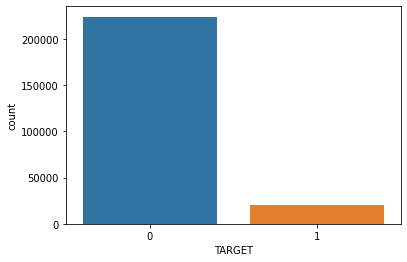

In [40]:
ax = sns.countplot(x="TARGET", data=df)

Observa-se que o a predição baseia-se em um problema classificatório. Nesse caminho, verificamos que os dados estão desbalanceados, sendo necessário o seu balanceamento, posto que, apesar do algorítimo escolhido para a predição ser o GradientBoostingClassifier que lida bem com classes desbalanceadas, para obtermos o melhor desempenho do algorítimo, decidimos balancear os dados contidos na coluna TARGET. O balanceamento será feito através do SMOTE, a técnica SMOTE pois ela para esta Base com os testes foi a que mais se adequou:

In [41]:
smt = SMOTE()

Finalizada a EDA, não houve necessidade de análise de outliers, tendo em vista que, devido a grande quantidade de dados, o oputlier não influenciará no resultado do modelo.

# Realizando a Modelagem dos Dados

Optamos por construir uma função para o pipeline contendo as preparações necessárias para os dados, incluindo o balanceamento, a normalização dos dados e transformações das colunas categóricas, conforme a seguir:

In [42]:
def pipe_pre_process_german(drop_not_features=["Risk"], col_target="Risk",
                             inputer_num_strategy="mean",
                             encoding="ordinal"):
    '''
    - inputer_num_strategy (str): "mean", "median";
    - encoding (str): "onehot" para OneHotEncoder; "ordinal" OrdinalEncoder;
    '''
    
    df = pd.read_csv("Aplication_train.csv", index_col=0)
    

    X = df.drop(columns=drop_not_features)
    y = df[col_target]
    
    X, y = smt.fit_resample(X, y)
    
    ax = sns.countplot(x=y)
    
    print(f'Verificando as Target Balanceadas.{ax}')
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

    # ==========================================================

    pipe_features_num = Pipeline([("input_num", SimpleImputer(strategy=inputer_num_strategy)),
                                  ("std", StandardScaler())])

    features_num = X_train.select_dtypes(include=np.number).columns.tolist()

    # ==========================================================

    if encoding == "onehot":
    
        pipe_features_cat = Pipeline([("input_cat", SimpleImputer(strategy="constant", fill_value="unknown")),
                                      ("onehot", OneHotEncoder(handle_unknown="ignore"))])
        
    elif encoding == "ordinal":
        
        pipe_features_cat = Pipeline([("input_cat", SimpleImputer(strategy="constant", fill_value="unknown")),
                                      ("ordinal", OrdinalEncoder(handle_unknown="use_encoded_value",
                                                                 unknown_value=-1))])
    
    else:
        
        raise ValueError("Únicos encodings disponíveis são 'ordinal' e 'onehot'")
        
        
    features_cat = X_train.select_dtypes(exclude=np.number).columns.tolist()

    # ==========================================================

    pre_processador = ColumnTransformer([("transf_num", pipe_features_num, features_num),
                                         ("transf_cat", pipe_features_cat, features_cat)])

    return X_train, X_test, y_train, y_test, pre_processador

Rodando as metricas do pipe_line definido

Verificando as Target Balanceadas.AxesSubplot(0.125,0.125;0.775x0.755)


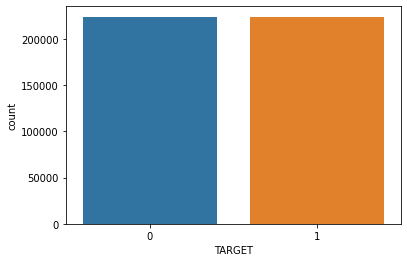

In [43]:
X_train, X_test, y_train, y_test, pre_processador = pipe_pre_process_german(drop_not_features=["TARGET"], 
                                                                            col_target="TARGET",
                                                                            inputer_num_strategy="mean",
                                                                            encoding="ordinal")

Visualisação do pre_processador: para saber o que esta sendo realmente feito nas feature categoricas e numéricas.

In [44]:
pre_processador

ColumnTransformer(transformers=[('transf_num',
                                 Pipeline(steps=[('input_num', SimpleImputer()),
                                                 ('std', StandardScaler())]),
                                 ['SK_ID_CURR', 'CNT_CHILDREN',
                                  'AMT_INCOME_TOTAL', 'AMT_CREDIT',
                                  'AMT_ANNUITY', 'AMT_GOODS_PRICE',
                                  'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH',
                                  'DAYS_EMPLOYED', 'DAYS_REGISTRATION',
                                  'DAYS_ID_PUBLISH', 'FLAG_EMP_PHONE',
                                  'FLAG_WORK_PHONE', 'FLAG_C...
                                  'REG_CITY_NOT_LIVE_CITY',
                                  'REG_CITY_NOT_WORK_CITY',
                                  'LIVE_CITY_NOT_WORK_CITY', 'EXT_SOURCE_2',
                                  'OBS_30_CNT_SOCIAL_CIRCLE',
                                  'DEF_30_CNT_SOCIAL_CIRCLE',
                                  'OBS_60_CNT_SOCIAL_CIRCLE', ...]),
                                ('transf_cat',
                                 Pipeline(steps=[('input_cat',
                                                  SimpleImputer(fill_value='unknown',
                                                                strategy='constant')),
                                                 ('ordinal',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1))]),
                                 [])])

Construindo uma função para análise da predição.

In [45]:
def metricas_classificacao(estimator, X_train, X_test, y_train, y_test):
    
    # ============================================

    print("\nMétricas de avaliação de treino:")

    y_pred_train = estimator.predict(X_train)

    ConfusionMatrixDisplay.from_predictions(y_train, y_pred_train)
    plt.show()

    print(classification_report(y_train, y_pred_train))

    # ============================================

    print("\nMétricas de avaliação de teste:")

    y_pred_test = estimator.predict(X_test)

    ConfusionMatrixDisplay.from_predictions(y_test, y_pred_test)
    plt.show()

    print(classification_report(y_test, y_pred_test))

    # ============================================

    f1_score_weighted = f1_score(y_test, y_pred_test, average='weighted')
    print(f"F1-score weighted: {100*f1_score_weighted:.2f}")
    return f1_score_weighted

Treinando o modelo e visualisando as métricas para análise.


Métricas de avaliação de treino:


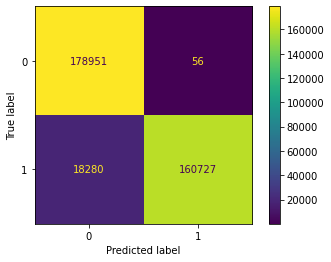

              precision    recall  f1-score   support

           0       0.91      1.00      0.95    179007
           1       1.00      0.90      0.95    179007

    accuracy                           0.95    358014
   macro avg       0.95      0.95      0.95    358014
weighted avg       0.95      0.95      0.95    358014


Métricas de avaliação de teste:


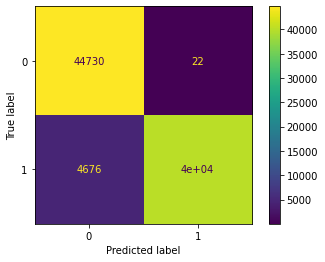

              precision    recall  f1-score   support

           0       0.91      1.00      0.95     44752
           1       1.00      0.90      0.94     44752

    accuracy                           0.95     89504
   macro avg       0.95      0.95      0.95     89504
weighted avg       0.95      0.95      0.95     89504

F1-score weighted: 94.74


In [46]:
pipe = Pipeline([("pp", pre_processador),
                 ("gb", GradientBoostingClassifier(random_state=42))])

pipe.fit(X_train, y_train)

score = metricas_classificacao(pipe, X_train, X_test, y_train, y_test)

In [47]:
score

0.9473684227127454

In [48]:
y_score = pipe.predict(X_test)

Construindo a curva ROC AUC

padrão: ROC AUC=0.500
gb: ROC AUC=0.969


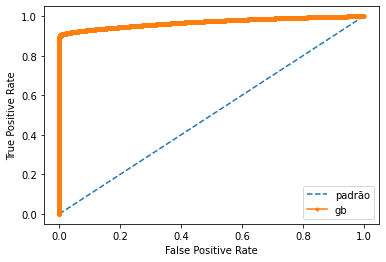

In [49]:
ns_probs = [0 for _ in range(len(y_test))]

# Predizendos as probabilidades

lr_probs = pipe.predict_proba(X_test)[::, 1]

# calculando scores

ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)

# resumindo scores

print('padrão: ROC AUC=%.3f' % (ns_auc))
print('gb: ROC AUC=%.3f' % (lr_auc))
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)

# plotando a curva roc do modelo

plt.plot(ns_fpr, ns_tpr, linestyle='--', label='padrão')
plt.plot(lr_fpr, lr_tpr, marker='.', label='gb')

# rótulos axis

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

# mostrando a legenda

plt.legend()

# plotando

plt.show()

Aqui podemos ver a curva ROC_AUC pois ela mostra que o modelo esta muito bem adequado para o modelo.

In [50]:
lr_probs

array([0.96306603, 0.1259976 , 0.88357349, ..., 0.38597676, 0.08402002,
       0.18367797])

In [51]:
df2 = pd.read_csv("application_test_student.csv", index_col=0)

In [52]:
df2

,SK_ID_CURR,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_2,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,NAME_CONTRACT_TYPE_Cash loans,NAME_CONTRACT_TYPE_Revolving loans,CODE_GENDER_F,CODE_GENDER_M,CODE_GENDER_XNA,FLAG_OWN_CAR_N,FLAG_OWN_CAR_Y,FLAG_OWN_REALTY_N,FLAG_OWN_REALTY_Y,NAME_TYPE_SUITE_Children,NAME_TYPE_SUITE_Family,NAME_TYPE_SUITE_Group of people,NAME_TYPE_SUITE_Other_A,NAME_TYPE_SUITE_Other_B,"NAME_TYPE_SUITE_Spouse, partner",NAME_TYPE_SUITE_Unaccompanied,NAME_INCOME_TYPE_Commercial associate,NAME_INCOME_TYPE_Maternity leave,NAME_INCOME_TYPE_Pensioner,NAME_INCOME_TYPE_State servant,NAME_INCOME_TYPE_Student,NAME_INCOME_TYPE_Unemployed,NAME_INCOME_TYPE_Working,NAME_EDUCATION_TYPE_Academic degree,NAME_EDUCATION_TYPE_Higher education,NAME_EDUCATION_TYPE_Incomplete higher,NAME_EDUCATION_TYPE_Lower secondary,NAME_EDUCATION_TYPE_Secondary / secondary special,NAME_FAMILY_STATUS_Civil marriage,NAME_FAMILY_STATUS_Married,NAME_FAMILY_STATUS_Separated,NAME_FAMILY_STATUS_Single / not married,NAME_FAMILY_STATUS_Unknown,NAME_FAMILY_STATUS_Widow,NAME_HOUSING_TYPE_Co-op apartment,NAME_HOUSING_TYPE_House / apartment,NAME_HOUSING_TYPE_Municipal apartment,NAME_HOUSING_TYPE_Office apartment,NAME_HOUSING_TYPE_Rented apartment,NAME_HOUSING_TYPE_With parents,WEEKDAY_APPR_PROCESS_START_FRIDAY,WEEKDAY_APPR_PROCESS_START_MONDAY,WEEKDAY_APPR_PROCESS_START_SATURDAY,WEEKDAY_APPR_PROCESS_START_SUNDAY,WEEKDAY_APPR_PROCESS_START_THURSDAY,WEEKDAY_APPR_PROCESS_START_TUESDAY,WEEKDAY_APPR_PROCESS_START_WEDNESDAY,ORGANIZATION_TYPE_Advertising,ORGANIZATION_TYPE_Agriculture,ORGANIZATION_TYPE_Bank,ORGANIZATION_TYPE_Business Entity Type 1,ORGANIZATION_TYPE_Business Entity Type 2,ORGANIZATION_TYPE_Business Entity Type 3,ORGANIZATION_TYPE_Cleaning,ORGANIZATION_TYPE_Construction,ORGANIZATION_TYPE_Culture,ORGANIZATION_TYPE_Electricity,ORGANIZATION_TYPE_Emergency,ORGANIZATION_TYPE_Government,ORGANIZATION_TYPE_Hotel,ORGANIZATION_TYPE_Housing,ORGANIZATION_TYPE_Industry: type 1,ORGANIZATION_TYPE_Industry: type 10,ORGANIZATION_TYPE_Industry: type 11,ORGANIZATION_TYPE_Industry: type 12,ORGANIZATION_TYPE_Industry: type 13,ORGANIZATION_TYPE_Industry: type 2,ORGANIZATION_TYPE_Industry: type 3,ORGANIZATION_TYPE_Industry: type 4,ORGANIZATION_TYPE_Industry: type 5,ORGANIZATION_TYPE_Industry: type 6,ORGANIZATION_TYPE_Industry: type 7,ORGANIZATION_TYPE_Industry: type 8,ORGANIZATION_TYPE_Industry: type 9,ORGANIZATION_TYPE_Insurance,ORGANIZATION_TYPE_Kindergarten,ORGANIZATION_TYPE_Legal Services,ORGANIZATION_TYPE_Medicine,ORGANIZATION_TYPE_Military,ORGANIZATION_TYPE_Mobile,ORGANIZATION_TYPE_Other,ORGANIZATION_TYPE_Police,ORGANIZATION_TYPE_Postal,ORGANIZATION_TYPE_Realtor,ORGANIZATION_TYPE_Religion,ORGANIZATION_TYPE_Restaurant,ORGANIZATION_TYPE_School,ORGANIZATION_TYPE_Security,ORGANIZATION_TYPE_Security Ministries,ORGANIZATION_TYPE_Self-employed,ORGANIZATION_TYPE_Services,ORGANIZATION_TYPE_Telecom,ORGANIZATION_TYPE_Trade: type 1,ORGANIZATION_TYPE_Trade: type 2,ORGANIZATION_TYPE_Trade: type 3,ORGANIZATION_TYPE_Trade: type 4,ORGANIZATION_TYPE_Trade: type 5,ORGANIZATION_TYPE_Trade: type 6,ORGANIZATION_TYPE_Trade: type 7,ORGANIZATION_TYPE_Transport: type 

In [57]:
yproba = pipe.predict_proba(df2)[::, 1]
yproba

array([[0.92891283, 0.07108717],
       [0.92274734, 0.07725266],
       [0.76751884, 0.23248116],
       ...,
       [0.84477579, 0.15522421],
       [0.72589777, 0.27410223],
       [0.82226625, 0.17773375]])

In [54]:
pd.DataFrame(yproba, columns = ['Target']).to_csv('probabilidades.csv', index = None)

In [55]:
df_proba = pd.read_csv("probabilidades.csv")

In [56]:
df_proba

,Target
0,0.071087
1,0.077253
2,0.232481
3,0.119400
4,0.145092
...,...
61498,0.132893
61499,0.249443
61500,0.155224
61501,0.274102


**Integrantes:**
<ul>
    <li>William de Oliveira</li>
    <li>Mariana Leite</li>
    <li>Antony Albert</li>
    <li>Rafael Rodrigues</li>
</ul>